In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/2022-ukraine-russian-war/russia_losses_equipment.csv
/kaggle/input/2022-ukraine-russian-war/russia_losses_equipment_correction.csv
/kaggle/input/2022-ukraine-russian-war/russia_losses_personnel.csv


In [2]:
df=pd.read_csv("/kaggle/input/2022-ukraine-russian-war/russia_losses_equipment.csv")
df.head(20)

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,greatest losses direction,vehicles and fuel tanks,cruise missiles,submarines
0,2022-02-25,2,10,7,80,516,49,4,100.0,60.0,0,2,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-02-26,3,27,26,146,706,49,4,130.0,60.0,2,2,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-02-27,4,27,26,150,706,50,4,130.0,60.0,2,2,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-02-28,5,29,29,150,816,74,21,291.0,60.0,3,2,5,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-03-01,6,29,29,198,846,77,24,305.0,60.0,3,2,7,NaN,NaN,NaN,NaN,NaN,NaN
5,2022-03-02,7,30,31,211,862,85,40,355.0,60.0,3,2,9,NaN,NaN,NaN,NaN,NaN,NaN
6,2022-03-03,8,30,31,217,900,90,42,374.0,60.0,3,2,11,NaN,NaN,NaN,NaN,NaN,NaN
7,2022-03-04,9,33,37,251,939,105,50,404.0,60.0,3,2,18,NaN,NaN,NaN,NaN,NaN,NaN
8,2022-03-05,10,39,40,269,945,105,50,409.0,60.0,3,2,19,NaN,NaN,NaN,NaN,NaN,NaN
9,2022-03-06,11,44,48,285,985,109,50,447.0,60.0,4,2,21,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.isnull().sum()   #To check the no.of nan values

date                           0
day                            0
aircraft                       0
helicopter                     0
tank                           0
APC                            0
field artillery                0
MRL                            0
military auto                638
fuel tank                    638
drone                          0
naval ship                     0
anti-aircraft warfare          0
special equipment             19
mobile SRBM system           667
greatest losses direction    500
vehicles and fuel tanks       65
cruise missiles               65
submarines                   566
dtype: int64

In [4]:
df.dtypes            #To know the data types

date                          object
day                            int64
aircraft                       int64
helicopter                     int64
tank                           int64
APC                            int64
field artillery                int64
MRL                            int64
military auto                float64
fuel tank                    float64
drone                          int64
naval ship                     int64
anti-aircraft warfare          int64
special equipment            float64
mobile SRBM system           float64
greatest losses direction     object
vehicles and fuel tanks      float64
cruise missiles              float64
submarines                   float64
dtype: object

In [5]:
df.describe()         #To know the statistical summary

,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,vehicles and fuel tanks,cruise missiles,submarines
count,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,703.000000,65.000000,65.000000,703.000000,703.000000,703.000000,684.000000,36.000000,638.000000,638.000000,137.0
mean,353.000000,269.652916,255.679943,3208.102418,6377.048364,3188.130868,493.826458,1047.507692,69.323077,2548.601707,16.339972,292.813656,429.505848,3.944444,5945.366771,873.316614,1.0
std,203.082906,64.105163,68.251389,1549.438275,2684.873172,2595.612871,257.368778,466.162060,7.545917,2018.371800,4.415678,186.114678,409.409704,0.333333,2727.974596,550.810281,0.0
min,2.000000,10.000000,7.000000,80.000000,516.000000,49.000000,4.000000,100.000000,60.000000,0.000000,2.000000,0.000000,10.000000,2.000000,1796.000000,84.000000,1.0
25%,177.500000,234.000000,197.000000,1903.000000,4203.500000,1017.000000,266.000000,600.000000,60.000000,799.000000,15.000000,141.000000,105.000000,4.000000,3865.250000,246.000000,1.0
50%,353.000000,295.000000,286.000000,3267.000000,6474.000000,2270.000000,463.000000,1178.000000,73.000000,1997.000000,18.000000,234.000000,225.500000,4.000000,5385.500000,907.000000,1.0
75%,528.500000,315.000000,311.000000,4234.500000,8256.500000,4954.000000,704.500000,1437.000000,76.000000,4121.000000,18.000000,466.000000,748.500000,4.000000,7714.500000,1406.000000,1.0
max,704.000000,331.000000,324.000000,6280.000000,11671.000000,9097.000000,972.000000,1701.000000,76.000000,7041.000000,23.000000,660.000000,1436.000000,4.000000,12103.000000,1845.000000,1.0


In [6]:
#Time Series Analysis
df['date']=pd.to_datetime(df['date'])
df.set_index('date',inplace=True)

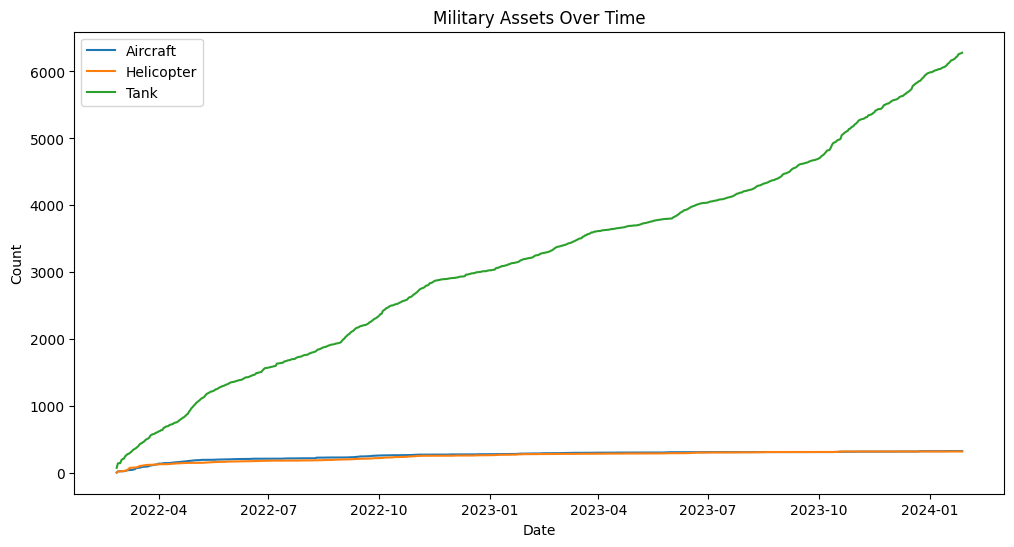

In [7]:
#Plotting
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))
sns.lineplot(x=df.index,y=df['aircraft'],label='Aircraft')
sns.lineplot(x=df.index,y=df['helicopter'],label='Helicopter')
sns.lineplot(x=df.index,y=df['tank'],label='Tank')
plt.title("Military Assets Over Time")
plt.xlabel("Date")
plt.ylabel("Count")
plt.legend()
plt.show()


In [8]:
#Greatest losses Direction
df['greatest losses direction'].value_counts()

greatest losses direction
Donetsk                              28
Bakhmut                              25
Kramatorsk and Donetsk                9
Kramatorsk                            8
Kharkiv and Donetsk                   6
                                     ..
Sloviansk and Bakhmut                 1
Sloviansk, Bakhmut and Avdiivka       1
Sloviansk, Bakhmut and Kryvyi Rih     1
Bakhmut and Sievierodonetsk           1
Donetsk and Mykolaiv                  1
Name: count, Length: 64, dtype: int64

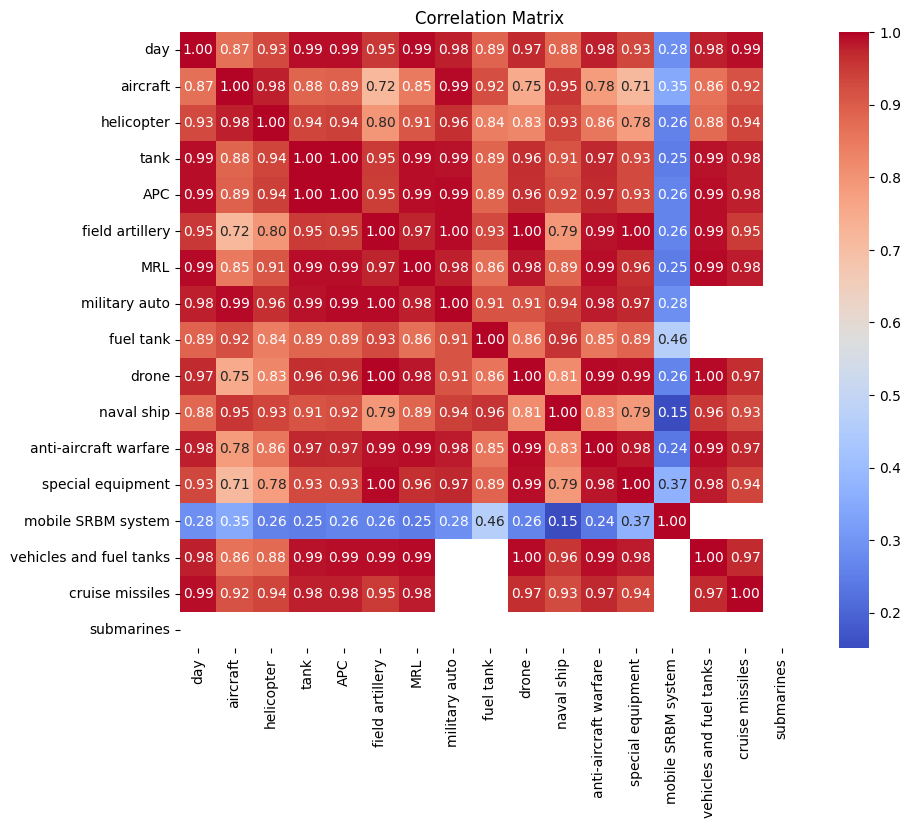

In [9]:
#Correlation Analysis
# Exclude non-numeric columns from correlation analysis
numeric_columns = df.select_dtypes(include=['number'])
correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

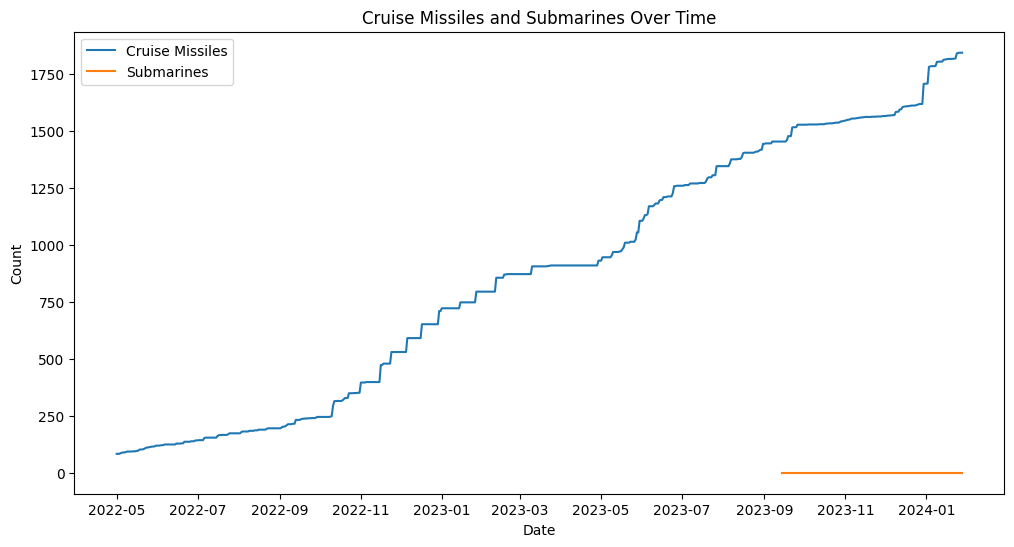

In [10]:
#Analyse specific columns related to cruise missles and submarines

plt.figure(figsize=(12, 6))
sns.lineplot(x=df.index, y=df['cruise missiles'], label='Cruise Missiles')
sns.lineplot(x=df.index, y=df['submarines'], label='Submarines')
plt.title('Cruise Missiles and Submarines Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()

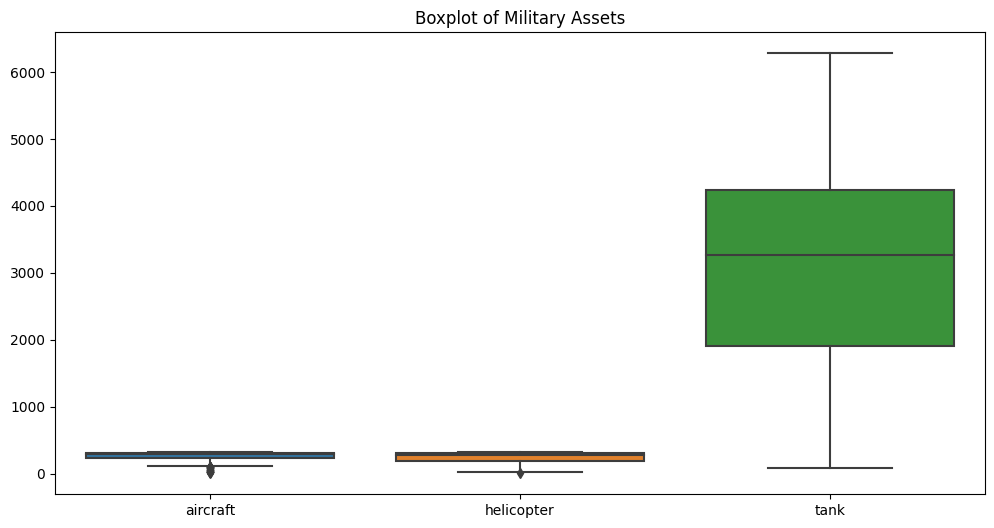

In [11]:
#Explore Outliers
#Identity and analyse outliers in data
plt.figure(figsize=(12,6))
sns.boxplot(data=df[['aircraft','helicopter','tank']])
plt.title('Boxplot of Military Assets')
plt.show()

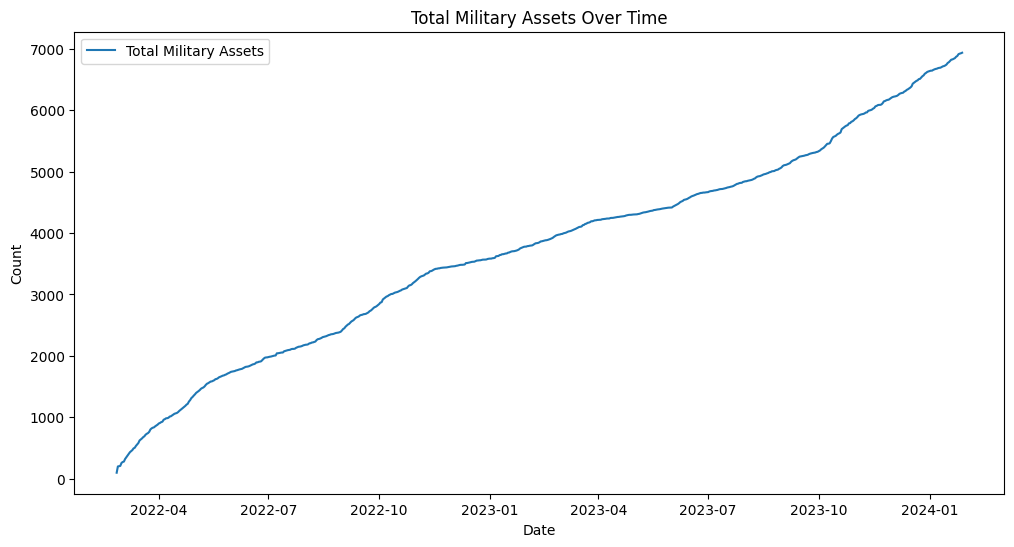

In [12]:
#Pattern Analysis
# Look for patterns or anomalies in the data
# For example, you can analyze the change in the number of military assets over time

plt.figure(figsize=(12,6))
sns.lineplot(x=df.index,y=df['aircraft']+df['helicopter']+df['tank'],label='Total Military Assets')
plt.title("Total Military Assets Over Time")
plt.xlabel("Date")
plt.ylabel("Count")
plt.legend()
plt.show()

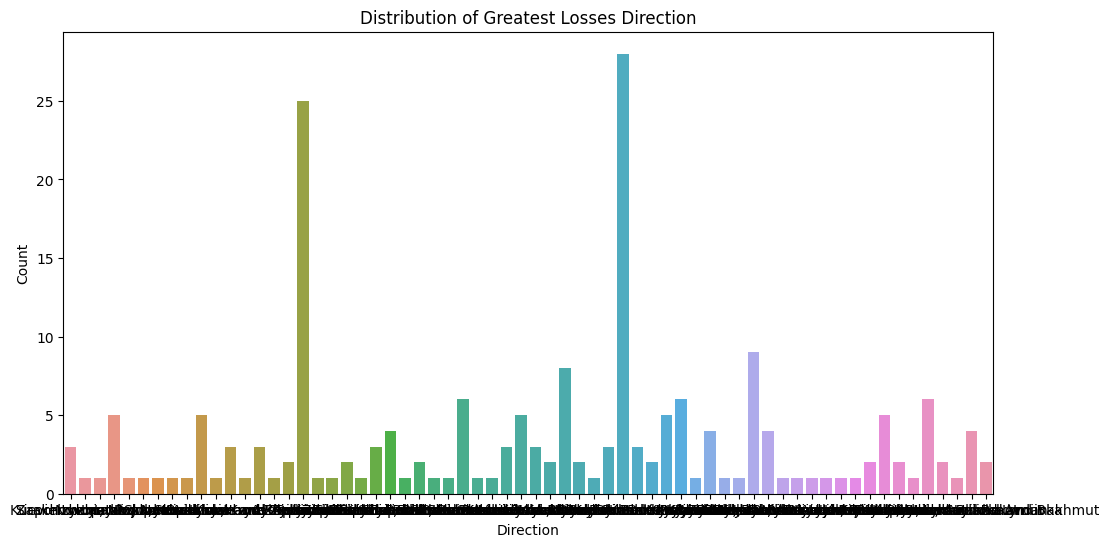

In [13]:
#Geographical Analysis
plt.figure(figsize=(12, 6))
sns.countplot(x='greatest losses direction', data=df)
plt.title('Distribution of Greatest Losses Direction')
plt.xlabel('Direction')
plt.ylabel('Count')
plt.show()

<Figure size 1200x600 with 0 Axes>

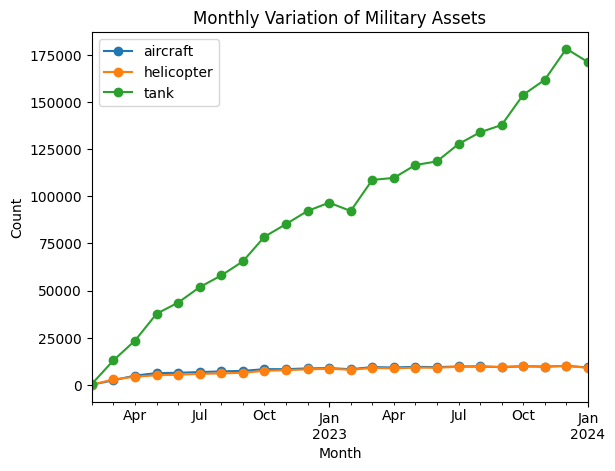

In [14]:
#Temporal Analysis
plt.figure(figsize=(12, 6))
df.resample('M').sum().plot(y=['aircraft', 'helicopter', 'tank'], kind='line', marker='o')
plt.title('Monthly Variation of Military Assets')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend()
plt.show()

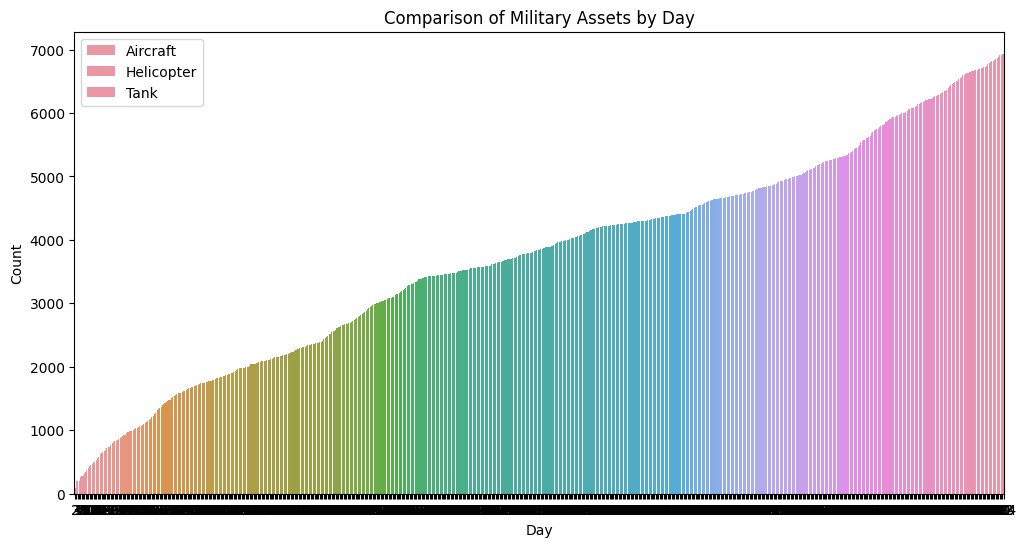

In [15]:
#  Comparisons
plt.figure(figsize=(12, 6))
sns.barplot(x='day', y='aircraft', data=df, label='Aircraft')
sns.barplot(x='day', y='helicopter', data=df, label='Helicopter', bottom=df['aircraft'])
sns.barplot(x='day', y='tank', data=df, label='Tank', bottom=df['aircraft']+df['helicopter'])
plt.title('Comparison of Military Assets by Day')
plt.xlabel('Day')
plt.ylabel('Count')
plt.legend()
plt.show()


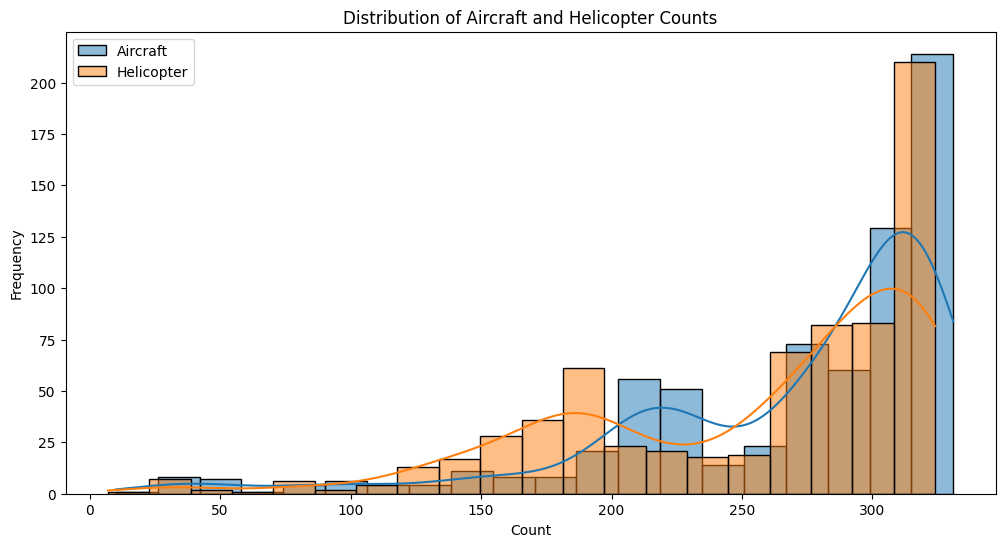

In [16]:
# Distribution Analysis
plt.figure(figsize=(12, 6))
sns.histplot(df['aircraft'], bins=20, kde=True, label='Aircraft')
sns.histplot(df['helicopter'], bins=20, kde=True, label='Helicopter')
plt.title('Distribution of Aircraft and Helicopter Counts')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.legend()
plt.show()
